DATA COLLECTION

For my data, I wanted to find some on a topic that interested me. So I scoured kaggle for any datasets that had to do with gaming but nothing made sense for what I wanted, or was too narrow in scope (ex. an individual player's performance in a single game over a couple years). So I searched for the one thing I always wanted to do a project on: Dungeon and Dragons. I quickly found a github dataset on D&D character creation for about a thousand players. The project wasn't "a few thousand rows", and in fact only had about 850 unique entries, but I knew I could make it work. 
I found my data from: https://github.com/oganm/dndstats
Specifically:https://github.com/oganm/dndstats/blob/master/docs/uniqueTable.tsv

In [49]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [50]:
#Loading Data
chardata = pd.read_csv("uniqueTable.csv")

In [51]:
chardata.head

<bound method NDFrame.head of          name                race              background  \
0      22bf79          Deep Gnome                 Acolyte   
1      b1bd6b               Human                  Hermit   
2      e9a755            Wood Elf           Guild Artisan   
3      68bf99               Kenku            Clan Crafter   
4      7b7c1c               Human               Folk Hero   
5      c4f62f          Dragonborn                  Hermit   
6      1ed728            Half-Elf           Faction Agent   
7      eecfc2            Tiefling               Charlatan   
8      7ff7d2            Tiefling                   Noble   
9      370d36          Gray Dwarf                 Acolyte   
10     a18c47      Stout Halfling      Cloistered Scholar   
11     c22cbc          Dragonborn             Haunted One   
12     a9a61d              Turtle                Criminal   
13     cb9242              Goblin                Criminal   
14     2b842f          Lizardfolk       Mercenary Veter

CLEANING

First I checked how much data to work with, and then I check what format each field is. They're mall either objects or integers, which is exactly what I needed. Then I checked how much of each field contains missing data, and the only ones that had missing data that I would have wanted to use were the character alignment fields, specifically alignment, processedAlignment, good, and lawful. The other ones missing data didn't need full data, nor were I interested in them. For example, I didn't need to worry about the starting weapons for every character, and the characters who weren't spellcasters weren't going to have any data for spells. 
For the exploratory stage

In [52]:
print ('The data has {0} rows and {1} columns'.format(chardata.shape[0],chardata.shape[1]))

The data has 885 rows and 29 columns


In [53]:
#separate variables into new data frames
numeric_data = chardata.select_dtypes(include=[np.number])
cat_data = chardata.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in chardata".format(numeric_data.shape[1],cat_data.shape[1]))

There are 9 numeric and 20 categorical columns in chardata


In [54]:
chardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 29 columns):
name                  885 non-null object
race                  883 non-null object
background            881 non-null object
date                  885 non-null object
class                 885 non-null object
justClass             885 non-null object
subclass              677 non-null object
level                 885 non-null int64
feats                 294 non-null object
HP                    885 non-null int64
AC                    885 non-null int64
Str                   885 non-null int64
Dex                   885 non-null int64
Con                   885 non-null int64
Int                   885 non-null int64
Wis                   885 non-null int64
Cha                   885 non-null int64
alignment             254 non-null object
skills                885 non-null object
weapons               880 non-null object
spells                358 non-null object
day                   

In [55]:
#Missing value counts in each of these columns
miss = chardata.isnull().sum()/len(chardata)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

race                  0.002260
background            0.004520
weapons               0.005650
processedWeapons      0.015819
processedRace         0.028249
subclass              0.235028
spells                0.595480
processedSpells       0.595480
feats                 0.667797
alignment             0.712994
processedAlignment    0.718644
good                  0.718644
lawful                0.718644
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

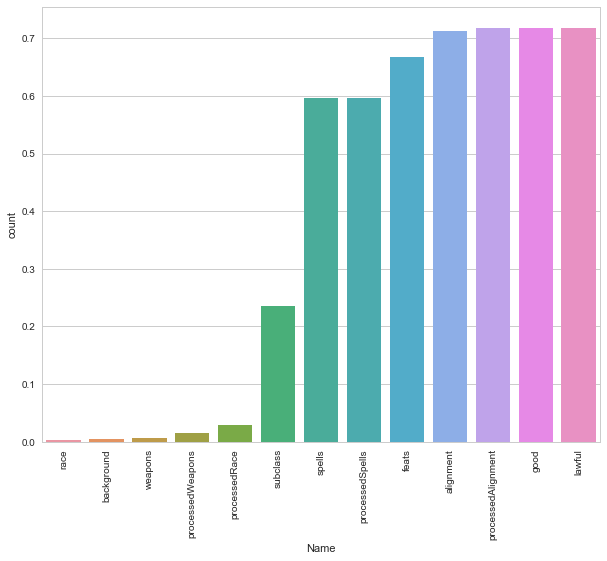

In [56]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)

EXPLORATORY DATA ANALYSIS

Now, I wanted to analyze the data I had and find out things I needed for my hypothesis test. Firstly, I wanted to just easily see the number of characters that were created at each level because my first thought was that most people only made level 1 characters, and personally I hate making level 1 characters.
Next, I did a correlation heat map, but it didn't work too well because most of the integer fields were the characters' ability scores (how strong, dextrous, or smart they are), and those were not what I wanted to look at. Although I was suprised that AC (Armor Class) was so strongly affected by the characters' strength scores, as I have always found Dexterity to be the most effective score to get a high AC. 
Lastly, I wanted to analyze how much average health the characters had per level, because I was thought it could be a good indicator of what classes people picked (if they picked tanky classes or squishy classes), but the bar graph I made was fairly normal excluding level 19. So, to find out why that was, and to hopefully see a little more detailed information, I switched to a dot plot to see how all the data actually lined up. This showed me that the reason level 19 was so high was because there was only one character made at that level. Which makes sense to me, because if you're going to make a character that high level, why not just make it level 20 (max level). This new dot plot also showed the variation that I was interested in as you can see a cone shape being formed with the tanky classes leading the steep curve and the squishy classes leading the low curve.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


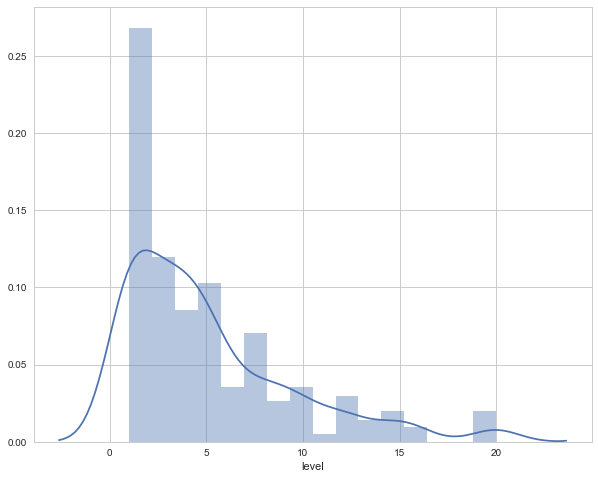

In [57]:
#Level
sns.distplot(chardata['level'])

In [58]:
#Skewness
print ('The skewness of character level is {}'.format(chardata['level'].skew()))

The skewness of character level is 1.4171206598548105


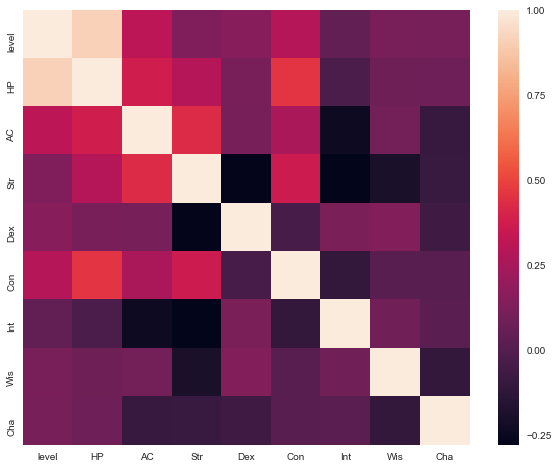

In [59]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

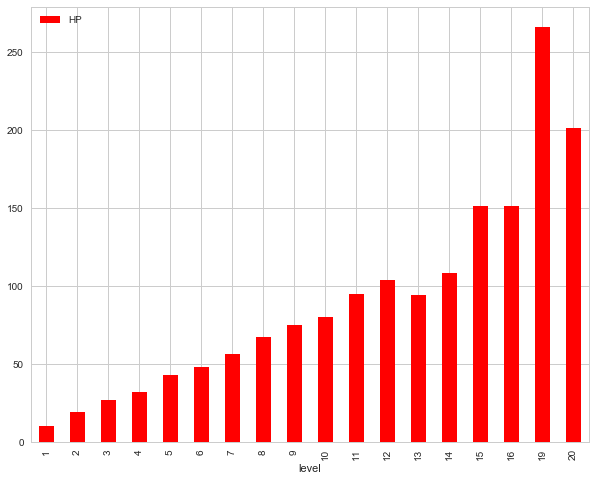

In [60]:
#let's check the mean health per level and plot it.
pivot = chardata.pivot_table(index='level', values='HP', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


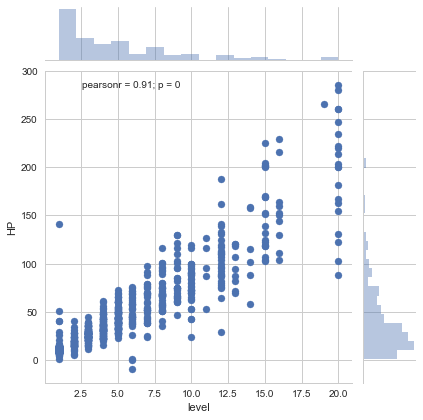

In [61]:
sns.jointplot(x=chardata['level'], y=chardata['HP'])

In [62]:
cat_data.describe()

,name,race,background,date,class,justClass,subclass,feats,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,levelGroup
count,885,883,881,885,885,885,677,294,254,885,880,358,885,249,249,249,860,358,871,885
unique,854,73,41,847,280,75,183,123,53,610,408,306,147,9,3,3,24,301,334,6
top,c42383,Human,Outlander,2018-04-16T21:33:57Z,Fighter 1,Fighter,Life Domain,Magic Initiate,Chaotic Good,Athletics|Perception|Survival|Intimidation,Rapier|Shortbow|Dagger,Protection from Evil and Good*1|Sanctuary*1|Le...,04 16 18,CN,G,C,Human,Bless*1|Cure Wounds*1,Rapier|Shortbow|Dagger,3-Jan
freq,5,198,81,39,37,104,21,16,41,23,47,5,43,69,122,128,199,5,48,408


HYPOTHESIS TEST & FEATURE ENGINEERING

My hypothesis for this project was something I always thought was true but wanted to prove. For me, spellcasters only got strong for mid-to-high level characters, and that non-spellcasters were only strong from low-to-mid level before the spellcasters became so strong. What I actually wanted to test to prove my theory was if more people created non-spellcasters between level 1-10.


In [63]:
#importing function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [64]:
chardata["processedSpells"].fillna(0, inplace=True)
chardata["justClass2"] = chardata["justClass"].map({np.nan: 0, "Fighter": 1, "Monk": 2, "Barbarian": 3, "Rogue": 4, "Paladin": 5, "Druid": 6, "Ranger": 7, "Bard": 8, "Mystic": 9, "Warlock": 10, "Wizard": 11, "Sorcerer": 12, "Cleric": 13}).astype(float)
chardata["processedRace"] = chardata["processedRace"].map({np.nan: 0, "Human": 1, "Elf": 2, "Dwarf": 3, "Gnome": 4, "Half-Elf": 5, "Half-Orc": 6, "Kenku": 7, "Dragonborn": 8, "Halfling": 9, "Tiefling": 10, "Lizardfolk": 11, "Goliath": 12, "Kenku": 13, "Turtle": 14, "Goblin": 15, "Tabaxi": 16, "Firbolg": 17, "Aarakocra": 18, "Aasimar": 19, "Genasi": 20, "Triton": 21, "Yuan-Ti": 22, "Bugbear": 23, "Kobold": 24}).astype(float)

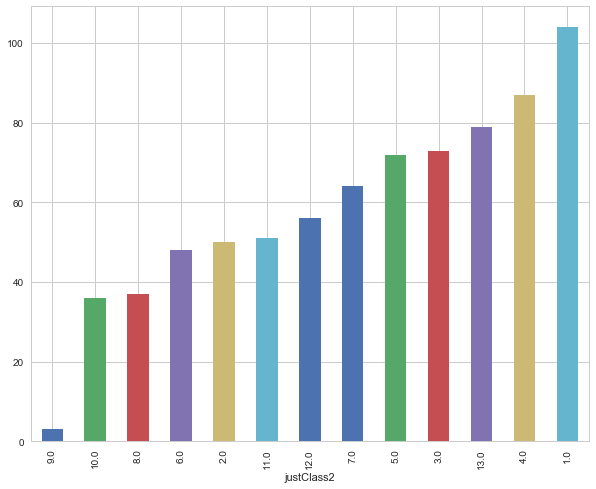

In [65]:
chardata['level'].groupby(chardata["justClass2"]).count().sort_values().plot(kind='bar')

"Fighter": 1, "Monk": 2, "Barbarian": 3, "Rogue": 4, "Paladin": 5, "Druid": 6, "Ranger": 7, "Bard": 8, "Mystic": 9, "Warlock": 10, "Wizard": 11, "Sorcerer": 12, "Cleric": 13

HYPOTHESIS TEST, FEATURE ENGINEERING, & MODEL SELECTION

Thanks to the above graph, counting how many characters are made with each class, we can clearly see that fighter and rogue (both not spellcasters) are the two most common classes, and that 3 of the top 4 most picked classes are not spellcasters. This, combined with the earlier graph that shows that most players are playing under level 10, indicates that yes, more players that make low-level characters are also picking non-spellcasting classes.

For my machine learning model, I chose decision tree because it's the best fit for categorical data, and random forest is too much for deciding what class to pick based off of level. It's best for this problem to create distinct groups and use those to decide which class to pick, because it's not so simple as to just pick spellcaster or non-spellcaster, the character will need to have a specific class.

MACHINE LEARNING MODEL IMPLEMENTATION

In [66]:
from sklearn.model_selection import train_test_split

X = chardata[["level"]]
Y = chardata["justClass"]

df_x = pd.DataFrame(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
assert len(X_train) + len(X_test) == len(X) # confirming the split was correctly done

In [73]:
#Defining a decision tree classifier
from sklearn.metrics import classification_report
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_pred))

                          precision    recall  f1-score   support

               Artificer       0.00      0.00      0.00         1
               Barbarian       0.00      0.00      0.00        23
     Barbarian|Bard|Monk       0.00      0.00      0.00         1
         Barbarian|Druid       0.00      0.00      0.00         1
       Barbarian|Fighter       0.00      0.00      0.00         1
        Barbarian|Ranger       0.00      0.00      0.00         1
                    Bard       0.00      0.00      0.00        15
            Bard|Warlock       0.00      0.00      0.00         2
                  Cleric       0.06      0.23      0.09        22
           Cleric|Wizard       0.00      0.00      0.00         1
                   Druid       0.00      0.00      0.00        17
         Druid|Barbarian       0.00      0.00      0.00         1
              Druid|Monk       0.00      0.00      0.00         1
                 Fighter       0.12      0.59      0.19        27
       Fi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


MACHINE LEARNING MODEL IMPLEMENTATION

So the decision tree was able to generate new data and leaned towards more fighters and rogues, as well as low-level characters, thus proving my hypothesis more correct.
As for short-comings, there definitely wasn't enough data to make a more accurate decision tree, and the data pushed out a lot of multi-classed characters since those were also part of my dataset. I didn't want to take them out because they are still valid options to choose, but it does fill up the classification report chart. In the future, if I were to do this project again, I would definitely need much more data.

CONCLUSION

I was not suprised with the outcome of the hypothesis testing, as most new players want to pick something easy to play, and having a list of spells will definitely complicate things. Honestly, though, I would have like to trash this project and start over with a different dataset because Dungeons and Dragons data is very hard to work with in regards to datascience. 
This model definitely wouldn't be worth developing in a business setting, as even if Wizards of the Coast (the creators of D&D) were to know that most new players pick non-spellcasters, they would still have to put a lot of time into making spellcasting classes, too. Plus, they probably have much higher-end data scientists to analyze this stuff much better. 
Again, if WotC focused only on non-spellcasting classes to appease new players, their older and higher level fans would be at a loss instead.
This project has taught me that I made the right decision leaving the Computer Science major. I knew I hated programming, so I switched to Information Systems, but I at least thought I had a decent grasp of the material early on in this class. Unfortunately, this project has revealed just how truly awful I am at programming in any language.